In [2]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import *

In [3]:
spec_names=('gap', 'shifted_gap', 'log10_gap', 'log10_shifted_gap', 'ratio')

In [84]:
dim_loc=4
L=3
n_dis=100
simdict={'dim_loc': dim_loc, 'L': L, 'n_dis': n_dis}
phi=np.pi/3
lambd=0.0
time_set= np.power(2, np.arange(40))
idata={'JZZ': 1.0, 'hZ': 1.0, 'hX': 1.0, 'alphas': np.array([np.exp(1j*phi)/2, 1, np.exp(-1j*phi)/2]),\
       'betas': np.array([0,lambd, 0]), 'lambdas': np.array([0,1,0]), 'phi': phi, 'lambd': lambd}
filename='clock4/clock4_%d_%.2f.txt' %(L,lambd)

In [85]:
clockH, clockK, clockZ = clock(dim_loc, L)
Z_mean, Z_var, spectral_data, spectral_data_var = simulation(dim_loc, L, n_dis, idata, clockH, clockK, clockZ, time_set)

with open(filename, 'wb') as f:
        for key, value in simdict.items():
            f.write(('\n# '+key+' '+str(value)).encode('utf-8'))
        for key, value in idata.items():
            f.write(('\n# '+key+' '+str(value)).encode('utf-8'))
        for i in range(5):
            f.write(('\n# '+spec_names[i]+' '+str(spectral_data[i])+' '+str(spectral_data_var[i])).encode('utf-8'))
        f.write('\n# time\tRe(Z)\Im(Z)\tVar(Re(Z))\tVar(Im(Z))\n'.encode('utf-8'))
        np.savetxt(f, np.stack((time_set, np.real(Z_mean), np.imag(Z_mean), np.real(Z_var), np.imag(Z_var)), axis=-1))

/home/federica/Dropbox/Master/plot_tesi/2018/simulation.py:35: RuntimeWarning: divide by zero encountered in log10
  log10_shifted_gaps = np.log10(shifted_gap(spectrum, dim_loc))


size 3 	disorder realization 0 	time elapsed 0.008614063262939453
size 3 	disorder realization 1 	time elapsed 0.008286237716674805
size 3 	disorder realization 2 	time elapsed 0.008208990097045898
size 3 	disorder realization 3 	time elapsed 0.0083465576171875
size 3 	disorder realization 4 	time elapsed 0.008196830749511719
size 3 	disorder realization 5 	time elapsed 0.008173704147338867
size 3 	disorder realization 6 	time elapsed 0.008106470108032227
size 3 	disorder realization 7 	time elapsed 0.008131980895996094
size 3 	disorder realization 8 	time elapsed 0.008121967315673828
size 3 	disorder realization 9 	time elapsed 0.008091449737548828
size 3 	disorder realization 10 	time elapsed 0.00808572769165039
size 3 	disorder realization 11 	time elapsed 0.00809621810913086
size 3 	disorder realization 12 	time elapsed 0.008077383041381836
size 3 	disorder realization 13 	time elapsed 0.008126974105834961
size 3 	disorder realization 14 	time elapsed 0.00823354721069336
size 3 	di

/home/federica/anaconda3/lib/python3.5/site-packages/numpy/core/_methods.py:112: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


In [63]:
import re

lenarr=len(time_set)

dt = np.dtype([('JZZ', np.float64), ('hZ', np.float64), ('hX', np.float64), 
               ('FILENAME', np.unicode_, 32), ('phi', np.float64), ('dim_loc', np.int32),
               ('n_dis', np.int32), ('L', np.int32), ('time_set', np.float64, (lenarr,)),
               ('ReZ', np.float64, (lenarr,)), ('ImZ', np.float64, (lenarr,)), ('ReVarZ', np.float64, (lenarr,)),
               ('ImVarZ', np.float64, (lenarr,))])

def get_data(file):
    d = np.zeros([], dtype=dt)
    d['FILENAME']=file
    with open(file) as f:
        for line in f:
            try:
                m = re.match("# (\S+) ([-+]?\d+.\d+e[+-]?\d+)", line)
                d[m.group(1)]=float(m.group(2))
            except:
                try:
                    m = re.match("# (\S+) ([-+]?\d+.\d+)", line)
                    d[m.group(1)]=float(m.group(2))                  
                except:
                    try:
                        m = re.match("# (\S+) (\d+)", line)
                        d[m.group(1)]=int(m.group(2))                       
                    except: pass
    d['time_set'], d['ReZ'], d['ImZ'], d['ReVarZ'], d['ImVarZ']=np.genfromtxt(file, unpack=True, dtype=np.complex128)
    return d

In [86]:
dataset=np.empty(0, dtype=dt)
for L in range(2,4):
    d=get_data('clock4/clock4_%d_0.00.txt' %L)
    dataset=np.append(dataset, d)

/home/federica/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:28: ComplexWarning: Casting complex values to real discards the imaginary part


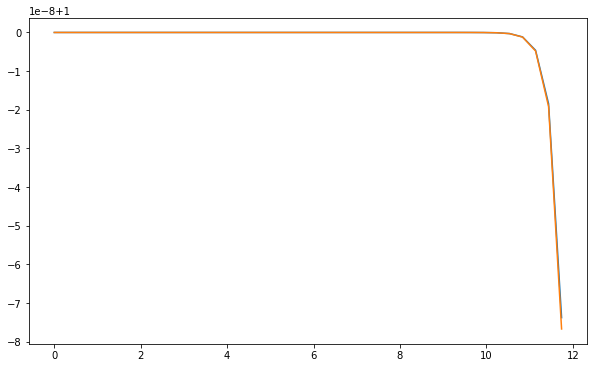

In [87]:
f, ax = plt.subplots(1,1,figsize=(10,6))

for sim in dataset:
    ax.plot(np.log10(sim['time_set']), sim['ReZ'],label= r'$L=$%d' % L)

plt.show()